In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from function_bonus import varimax
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Dati il set di dati, l'algoritmo K means, il numero ideale di Cluster e l'analisi PCA

In [ ]:
# riprendi il dataset svolto nel primo punto --> da sostituire

np.random.seed(42)

num_observations = 27262
num_variables = 8
data = np.random.randn(num_observations, num_variables)
columns = [f'Feature_{i+1}' for i in range(num_variables)]
df = pd.DataFrame(data, columns=columns)



### How to select components?

Once PCA has been performed on a dataset, the first two components are typically selected because they explain the most variance. This is particularly crucial when visualizing data in a two-dimensional space. If the original data is complex and multidimensional, reducing it to two dimensions provides a clearer view of the data's structure, facilitating the identification of patterns, trends, or clusters within the data.

When running a clustering algorithm like K-means, the goal is to find groups (clusters) of similar data. However, in a high-dimensional dataset, identifying these groups can be challenging as the distances between points become blurred across many dimensions. By applying PCA, we can reduce the number of variables on which to calculate distance while preserving the dataset's primary structure. The first two principal components represent the directions along which the data varies the most, which can lead to a clearer separation of groups, making the clustering process more effective.

In [ ]:
# riprendi i risultati della PCA svolta nel secondo punto --> da sostituire

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
explained_variance = pca.explained_variance_ratio_

In [ ]:
# select the first two component
pca_top2 = pca_result[:, :2]
print("\n2. PCA - Explained variance by the first two principal component:")
print(f"PC1: {explained_variance[0]:.4f}, PC2: {explained_variance[1]:.4f}")


2. PCA - Varianza spiegata dalle prime due componenti principali:
PC1: 0.1279, PC2: 0.1268


Once the two components have been selected, a Varimax rotation is performed. This is a technique used to clarify the relationship between the components and the original variables, thus improving the separation of clusters. Varimax rotation is an orthogonal rotation (components remain uncorrelated) that aims to maximize the variance of the loadings within each component or factor. In other words, Varimax modifies the orientation of the components to make the differences in the contributions of the variables more apparent. In a clustering context, it can improve the distinction between groups of data that would otherwise appear overlapping.

In [ ]:
# per il momento generiamo pca_top2 in modo da esaltare il clustering --> da sostituire

from sklearn.datasets import make_blobs
n_samples = 27262
random_state = 1700
pca_top2, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=15)

In [ ]:
rotated_components = varimax(pca_top2)

# print the rotations result
print("\n Principal components after the rotation:")
print(rotated_components[:5]) 


Componenti principali dopo la rotazione Varimax:
[[ 0.81509038 12.68127466]
 [13.29648128 -0.16853429]
 [-1.86435786  8.05383502]
 [-4.09757741  1.32523085]
 [11.76566165 -0.25038264]]


Let's proceed by applying the modified K-Means algorithm in order to observe the different clusters at each iteration.

In [7]:
from function_bonus import k_means,save_gif_from_plots

We use the Yellowbrick library to visualize the Elbow Method in order to determine the optimal number of clusters for a clustering model, in this case using KMeans from scikit-learn.

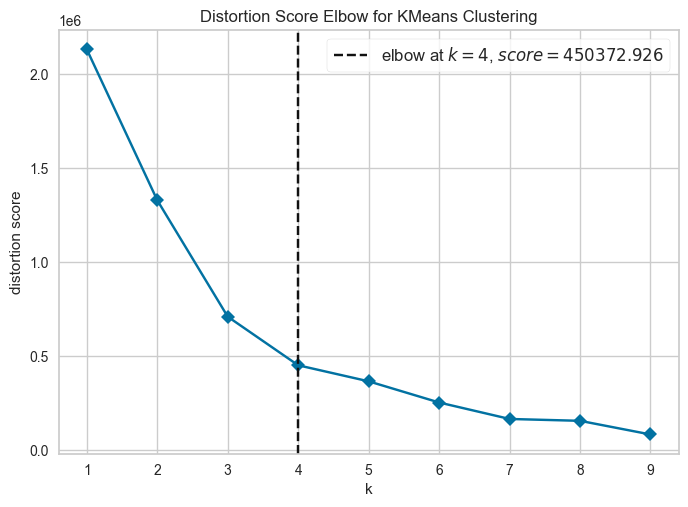

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)
visualizer.fit(rotated_components) 
visualizer.show()

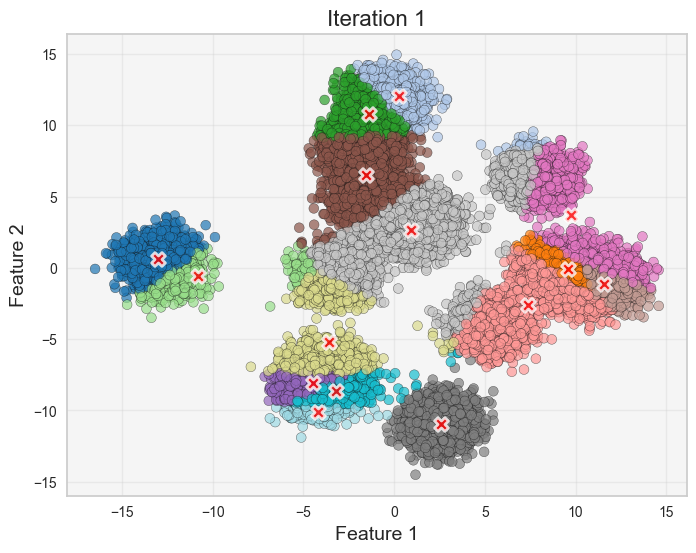

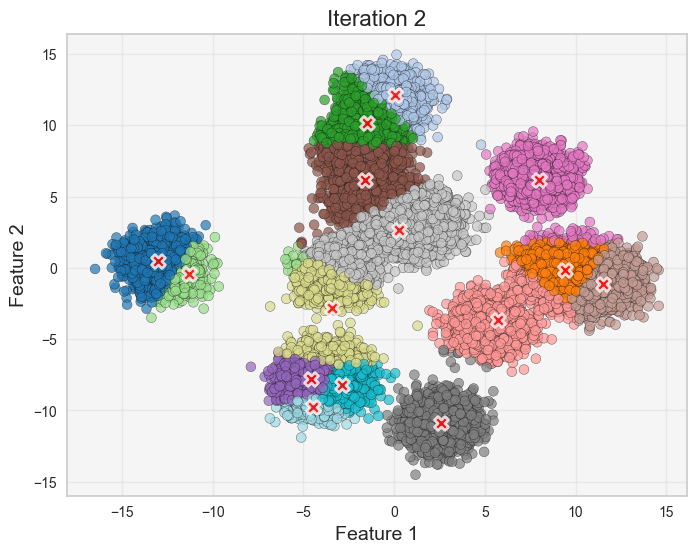

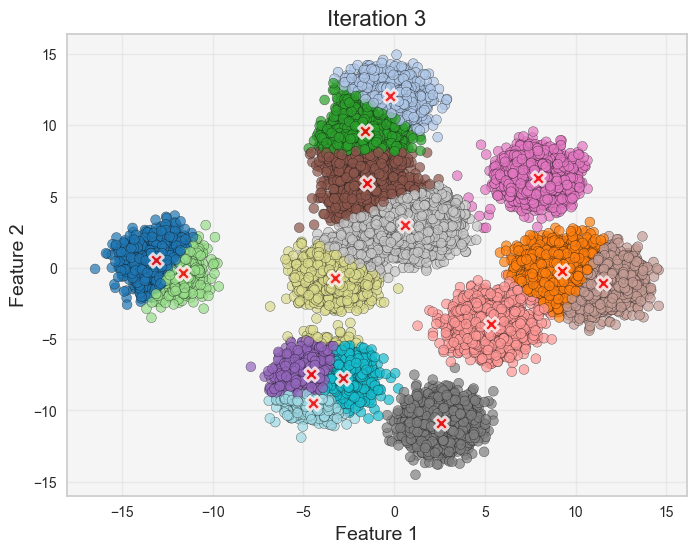

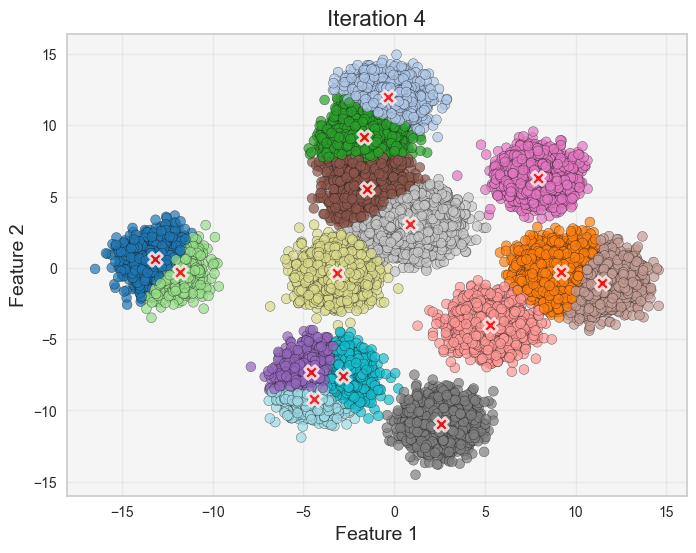

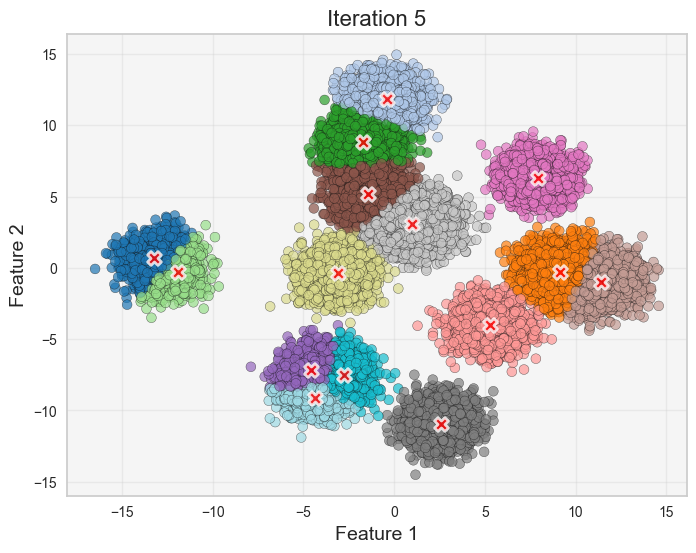

In [9]:
centroids, cluster_labels, plot_objects = k_means(rotated_components, k=15, max_iters=5, plot_every_iteration=True)

A GIF will be created to visualize the iterative process of the K-means algorithm.

In [10]:
save_gif_from_plots(plot_objects, gif_filename="kmeans_animation.gif", duration=500)

GIF saved as kmeans_animation.gif
